# Laboratorio 2: Agrupación

Andrés Neira - 202123126 - Estudiante 1

Esteban Castelblanco - 202214942 - Estudiante 2

Daniel Stiven Roa Uribe - 202215803 - Estudiante 3

## 1. Carga de datos

In [3]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Datos_SenecaféAlpes.csv', sep=";")

## 2. Analisis y limpieza de datos génerica

### 2.1 Revisión general de variables

In [4]:
print("Primeras filas del dataset:")
display(df.head())

print("Tipos de variables:")
print(df.dtypes)

print("Descripción estadistica de variables numericas")
print(df.describe())

Primeras filas del dataset:


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Tipos de variables:
ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MétodoSecado            object
dtype: object
Descripción estadistica de variables numericas
                Area     Perimetro  LongitudEjeMayor  LongitudEjeMenor  \
count   14291.000000  1.305400e+04      13890.000000      14291.000000   
mean    53055.408999  7.729870e+05        319.985592        202.178613   
std     29396.080372  3.266493e+05         86.378452         45.494541   
min    -62716.000000 -1.012143e+06

En la revisión inicial de los datos se observa que las variables ID, RelaciónAspecto, DefectoVisible y MétodoSecado corresponden a atributos de tipo categórico, mientras que el resto de variables son numéricas y describen características morfológicas de los granos. A simple vista, se identifican valores nulos en algunas columnas como Excentricidad y ÁreaConvexa, lo cual debe ser tratado en la etapa de preparación. Asimismo, en la descripción numérica de las variables aparecen valores negativos en atributos que conceptualmente no pueden ser menores que cero (por ejemplo, área o perímetro), lo que sugiere la existencia de errores de captura o procesamiento que requieren un análisis más detallado para decidir su corrección o exclusión, dado que no tienen sentido dentro del contexto del negocio cafetero.

### 2.2 Selección de variables relevantes para la agrupación

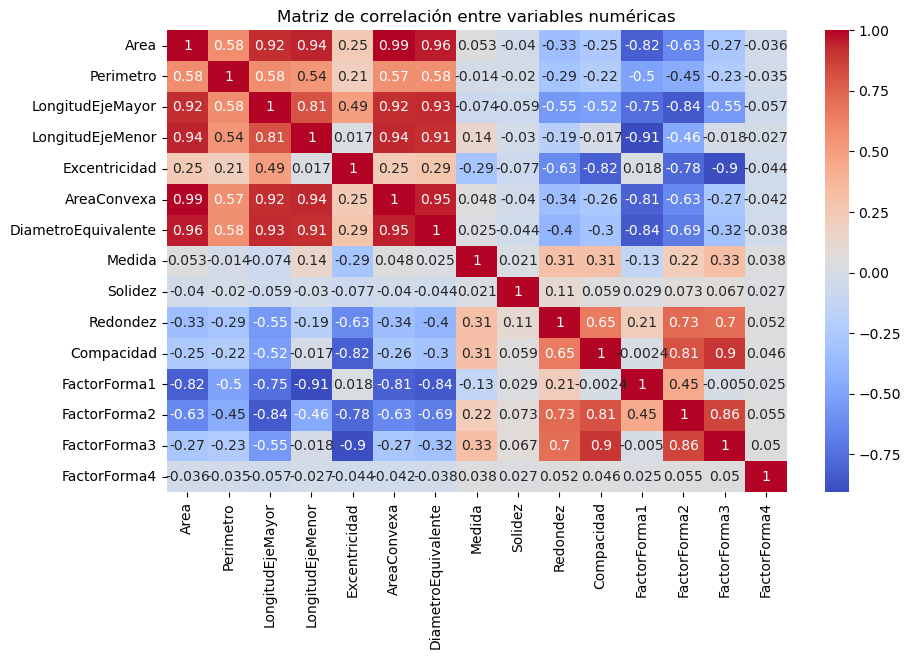

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [6]:
# Lista de columnas a eliminar por alta correlación
cols_to_drop = [
    "ID",
    "LongitudEjeMayor",
    "LongitudEjeMenor",
    "AreaConvexa",
    "DiametroEquivalente",
    "FactorForma1",
    "Compacidad",
    "FactorForma2",
    "FactorForma3"
]


df_reduced = df.drop(columns=cols_to_drop)

print("Variables eliminadas:", cols_to_drop)
print("\nShape original:", df.shape, " → Shape reducido:", df_reduced.shape)

df = df_reduced

Variables eliminadas: ['ID', 'LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'DiametroEquivalente', 'FactorForma1', 'Compacidad', 'FactorForma2', 'FactorForma3']

Shape original: (14291, 19)  → Shape reducido: (14291, 10)


Con base en el análisis de correlación, se decidió eliminar variables con correlaciones superiores a 0.8, ya que aportan información redundante y podrían sesgar el modelo de agrupación hacia dimensiones ya representadas. En el caso de las medidas de tamaño, se conservó únicamente el atributo Área y se descartaron LongitudEjeMayor, LongitudEjeMenor, ÁreaConvexa, DiámetroEquivalente y FactorForma1, debido a su alta redundancia. Respecto a las medidas de forma, se optó por mantener Excentricidad en lugar de Compacidad, ya que esta última constituye un índice alternativo de circularidad y se encuentra fuertemente correlacionada con Redondez. Finalmente, se eliminaron FactorForma2 y FactorForma3 por su alta correlación con Excentricidad, priorizando así un conjunto de variables más compacto, no redundante y representativo de la morfología de los granos. Además, de las categoricas, se decide eliminar ID porque no tiene ninguna representación en el modelo.

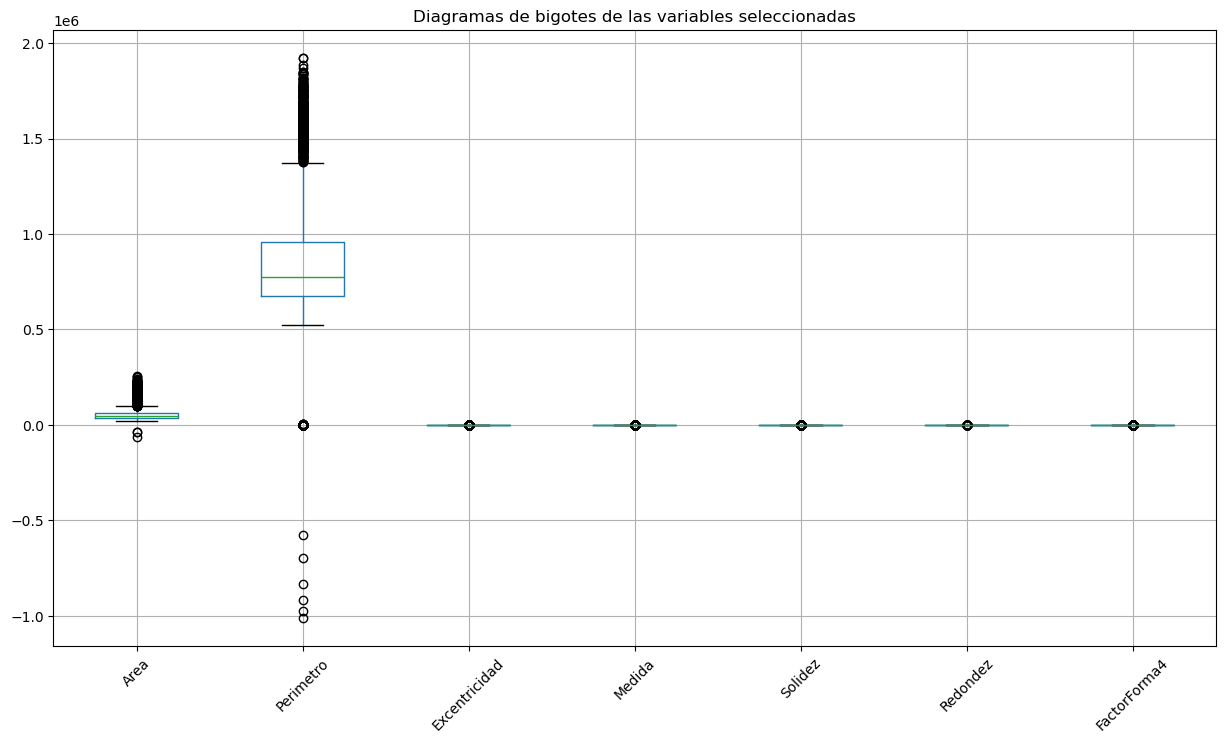

In [7]:
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas después de la reducción
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Crear boxplots
plt.figure(figsize=(15,8))
df[num_cols].boxplot(rot=45)
plt.title("Diagramas de bigotes de las variables seleccionadas")
plt.show()

En la exploración mediante diagramas de bigotes se observó que la mayoría de las variables presentan una distribución con pocos valores atípicos, lo cual confirma que la selección realizada aporta variabilidad suficiente para la tarea de agrupación. Los casos con mayor presencia de outliers corresponden a Área y Perímetro, lo que resulta esperable dado que son medidas directamente relacionadas con el tamaño del grano y pueden reflejar instancias extremas o errores de captura. Sin embargo, la variabilidad general de las variables se encuentra dentro de rangos aceptables, por lo que se considera que las características seleccionadas son adecuadas para diferenciar patrones morfológicos en el proceso de clustering.

### 2.3 Conversión de variables categoricas

In [8]:
print(df["RelacionAspecto"].value_counts())
print("Porcentaje de valores nulos: ", (df["RelacionAspecto"].isna().sum()/df.shape[0])*100)

RelacionAspecto
Alargado      12047
Redondeado     1739
alargado         29
redondeado       10
Name: count, dtype: int64
Porcentaje de valores nulos:  3.260793506402631


In [9]:
print(df["DefectoVisible"].value_counts())
print("Porcentaje de valores nulos: ", (df["DefectoVisible"].isna().sum()/df.shape[0])*100)

DefectoVisible
Normal    9096
normal    2260
Name: count, dtype: int64
Porcentaje de valores nulos:  20.53740116157022


In [10]:
print(df["MétodoSecado"].value_counts())
print("Porcentaje de valores nulos: ", (df["MétodoSecado"].isna().sum()/df.shape[0])*100)

MétodoSecado
Lavado     6260
Natural    4639
lavado     1552
natural    1176
Honey        64
honey        13
Name: count, dtype: int64
Porcentaje de valores nulos:  4.107480232314044


In [11]:
# Normalizar a minúsculas y quitar espacios
df["RelacionAspecto"] = df["RelacionAspecto"].str.lower().str.strip()
df["MétodoSecado"] = df["MétodoSecado"].str.lower().str.strip()

# Eliminar DefectoVisible por no aportar variabilidad
df = df.drop(columns=["DefectoVisible"])

# One-Hot Encoding para RelacionAspecto y MétodoSecado
df = pd.get_dummies(df, columns=["RelacionAspecto", "MétodoSecado"], drop_first=False)

print("Columnas finales después de procesar categóricas:")
print(df.columns.tolist())


Columnas finales después de procesar categóricas:
['Area', 'Perimetro', 'Excentricidad', 'Medida', 'Solidez', 'Redondez', 'FactorForma4', 'RelacionAspecto_alargado', 'RelacionAspecto_redondeado', 'MétodoSecado_honey', 'MétodoSecado_lavado', 'MétodoSecado_natural']


En cuanto a las variables categóricas, se decidió unificar la escritura de sus categorías a minúsculas para evitar duplicaciones artificiales en los conteos. En el caso de RelaciónAspecto, se conservaron las dos categorías (“alargado” y “redondeado”), a las cuales se les aplicó un proceso de codificación One-Hot Encoding con el fin de representarlas numéricamente y permitir su uso en los algoritmos de clustering.

Por su parte, DefectoVisible no se incluyó en el análisis, dado que todos los registros corresponden a granos “normales”, lo cual implica ausencia de variabilidad y, por tanto, nula capacidad de contribuir a la diferenciación entre grupos.

Finalmente, la variable MétodoSecado también se normalizó a minúsculas (“natural”, “lavado” y “honey”) y se codificó mediante One-Hot Encoding, ya que representa un atributo relevante para la interpretación de los clusters en términos de procesos de beneficio del café.

En el proceso de codificación One-Hot Encoding, los valores nulos presentes en RelaciónAspecto y MétodoSecado se representaron automáticamente como observaciones sin pertenencia a ninguna categoría (todas las variables dummy en cero). Dado que el porcentaje de valores faltantes en estas variables es bajo (3.26% y 4.10%, respectivamente) y no constituye un grupo significativo dentro de los datos, se consideró apropiado mantener este tratamiento. Esto permite conservar todos los registros sin introducir categorías artificiales ni eliminar información relevante.

### 2.4 Consistencia y válidez

In [12]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Contar valores negativos y calcular porcentajes
negativos = {}
for col in num_cols:
    total = df[col].shape[0]
    negativos[col] = {
        "valores_negativos": (df[col] < 0).sum(),
        "porcentaje": round(((df[col] < 0).sum() / total) * 100, 2)
    }

negativos_df = pd.DataFrame(negativos).T
print("Conteo y porcentaje de valores negativos por variable:")
display(negativos_df)
df.shape

Conteo y porcentaje de valores negativos por variable:


,valores_negativos,porcentaje
Area,3.0,0.02
Perimetro,6.0,0.04
Excentricidad,9.0,0.06
Medida,1.0,0.01
Solidez,2.0,0.01
Redondez,2.0,0.01
FactorForma4,5.0,0.03


(14291, 12)

In [13]:
# Seleccionar variables numéricas
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Convertir valores negativos a positivos (valor absoluto)
df[num_cols] = df[num_cols].abs()

Durante la revisión de consistencia se identificó un número reducido de valores negativos en variables que, conceptualmente, no deberían adoptar dichos valores (por ejemplo, Área o Perímetro). Aunque los casos eran poco frecuentes (menos del 0.1% del total), se consideró importante no perder información eliminando registros completos. Por esta razón, se decidió transformar los valores negativos a su equivalente positivo mediante la multiplicación por -1, con el fin de mantener la coherencia semántica de las variables y conservar la totalidad de las observaciones para el modelado.

In [14]:
df.describe()

,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,FactorForma4
count,14291.000000,1.305400e+04,13687.000000,14291.000000,11985.000000,12228.000000,13132.000000
mean,53074.609614,7.737548e+05,0.750928,0.749956,0.987103,0.873353,0.995050
std,29361.397053,3.248261e+05,0.091979,0.049096,0.004708,0.059344,0.004389
min,20420.000000,5.536000e+02,0.218951,0.555315,0.919246,0.489618,0.947687
25%,36344.000000,6.769542e+05,0.715475,0.718784,0.985598,0.832845,0.993667
50%,44660.000000,7.722165e+05,0.764421,0.760236,0.988279,0.883367,0.996378
75%,61324.500000,9.555055e+05,0.810500,0.786954,0.989991,0.916803,0.997889
max,254616.000000,1.921685e+06,0.911423,0.866195,0.994378,0.990685,0.999733


Tras la revisión de estadísticos descriptivos, no se encontraron inconsistencias adicionales en los datos. Todas las variables numéricas se encuentran dentro de rangos plausibles de acuerdo con su definición y el contexto del negocio. Por ejemplo, Excentricidad y Medida se mantienen dentro del rango teórico [0,1], mientras que Área y Perímetro presentan valores positivos acordes con las diferentes variedades de grano procesadas por la empresa. En general, las medidas de tendencia central y dispersión reflejan una variabilidad esperable y útil para la tarea de agrupación, sin evidencias de registros que violen restricciones conceptuales del dominio cafetero.

### 2.5 Completitud y unicidad

In [15]:
print("Valores nulos por columna:\n", df.isnull().sum())
print("\nPorcentaje de Valores nulos por columna:\n", ((df.isnull().sum()/df.count())*100))
print(f"\nFilas duplicadas: {df.duplicated().sum()}")
print(f"\nPorcentaje de Filas duplicadas: {(df.duplicated().sum()/df.shape[0])*100}")

Valores nulos por columna:
 Area                             0
Perimetro                     1237
Excentricidad                  604
Medida                           0
Solidez                       2306
Redondez                      2063
FactorForma4                  1159
RelacionAspecto_alargado         0
RelacionAspecto_redondeado       0
MétodoSecado_honey               0
MétodoSecado_lavado              0
MétodoSecado_natural             0
dtype: int64

Porcentaje de Valores nulos por columna:
 Area                           0.000000
Perimetro                      9.476023
Excentricidad                  4.412947
Medida                         0.000000
Solidez                       19.240718
Redondez                      16.871115
FactorForma4                   8.825769
RelacionAspecto_alargado       0.000000
RelacionAspecto_redondeado     0.000000
MétodoSecado_honey             0.000000
MétodoSecado_lavado            0.000000
MétodoSecado_natural           0.000000
dtype: float64



In [16]:
import numpy as np

# Imputación por media para variables continuas
cols_media = ["Perimetro", "Excentricidad", "Solidez", "FactorForma4"]
for col in cols_media:
    df[col] = df[col].fillna(df[col].mean())

# Imputación para Redondez usando la fórmula (4 * π * Área) / (Perímetro^2)
df["Redondez"] = df["Redondez"].fillna((4 * np.pi * df["Area"]) / (df["Perimetro"]**2))

print("Valores nulos restantes por columna:")
print(df.isnull().sum())


Valores nulos restantes por columna:
Area                          0
Perimetro                     0
Excentricidad                 0
Medida                        0
Solidez                       0
Redondez                      0
FactorForma4                  0
RelacionAspecto_alargado      0
RelacionAspecto_redondeado    0
MétodoSecado_honey            0
MétodoSecado_lavado           0
MétodoSecado_natural          0
dtype: int64


En la evaluación de completitud y unicidad se identificaron porcentajes de valores nulos superiores al 4% en algunas variables, lo cual justificó la decisión de realizar un proceso de imputación con el fin de conservar la mayor cantidad de registros posibles y asegurar una representación adecuada en el modelo de clustering. Para las variables Perímetro, Excentricidad, Solidez y FactorForma4 se aplicó imputación mediante la media, dado que se trata de variables continuas en las que esta estrategia permite preservar la tendencia central sin alterar la variabilidad general de los datos. En el caso de Redondez, se optó por aprovechar la definición establecida en el diccionario de datos y recalcular los valores faltantes mediante la fórmula (4*pi*Area)/(Perimetro)^2 utilizando atributos disponibles en el dataset. Este enfoque garantiza mayor coherencia semántica y fidelidad con el dominio del problema.

In [17]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

print("Shape del dataset después de eliminar duplicados:", df.shape)

Shape del dataset después de eliminar duplicados: (13591, 12)


En el análisis de unicidad se identificó que aproximadamente el 4.89% de las observaciones correspondían a registros duplicados. Aunque este porcentaje no es elevado, mantener dichas filas podría introducir un sesgo en el proceso de clustering, ya que el modelo interpretaría los duplicados como observaciones adicionales, reforzando artificialmente ciertos patrones. Por esta razón, se decidió eliminarlas, garantizando así un conjunto de datos más limpio, consistente y representativo de la verdadera variabilidad de los granos de café.

## 3. K-means

### 3.1 Preparación de datos (Estandarización)

In [18]:
from sklearn.preprocessing import StandardScaler

X = df.copy()
print(num_cols)
# Escalado guarado para devolverse luego
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape del dataset escalado:", X_scaled.shape)


Index(['Area', 'Perimetro', 'Excentricidad', 'Medida', 'Solidez', 'Redondez',
       'FactorForma4'],
      dtype='object')
Shape del dataset escalado: (13591, 12)


Para la preparación específica del algoritmo K-Means se aplicó un proceso de estandarización sobre todas las variables numéricas, dado que este algoritmo se fundamenta en la distancia euclidiana para asignar observaciones a clusters. La estandarización garantiza que cada atributo tenga media cero y varianza unitaria, evitando que variables con magnitudes mayores (como Área o Perímetro) dominen sobre otras que se encuentran en escalas reducidas (como Solidez o Excentricidad). Este paso es esencial para obtener agrupaciones más equilibradas y representativas de las características morfológicas de los granos de café.

### 3.2 Implementación del modelo

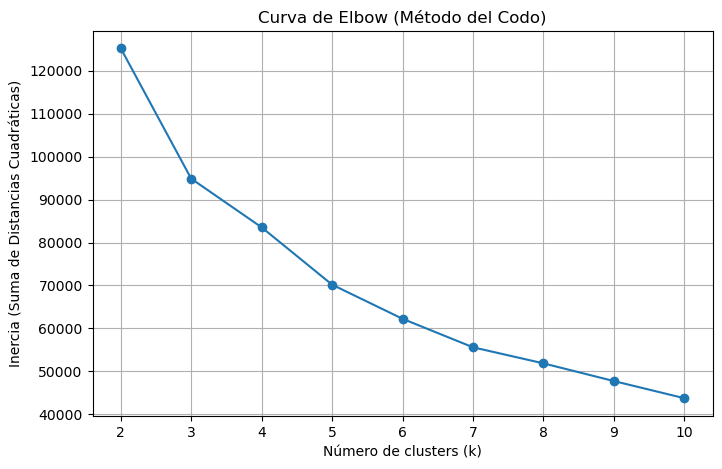

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# curva de elbow
k_range = range(2, 11) 
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar curva de elbow
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title("Curva de Elbow (Método del Codo)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de Distancias Cuadráticas)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


En la curva de Elbow se observa una disminución pronunciada de la inercia al pasar de 2 a 5 clusters, mientras que a partir de k=6 las mejoras se vuelven graduales y menos significativas. Este comportamiento sugiere que el número óptimo de clusters se encuentra en el rango de 4 a 7. Para este estudio se selecciona k=7, al considerarse un valor que equilibra adecuadamente la simplicidad del modelo con la capacidad de diferenciar patrones relevantes en los datos morfológicos de los granos de café.

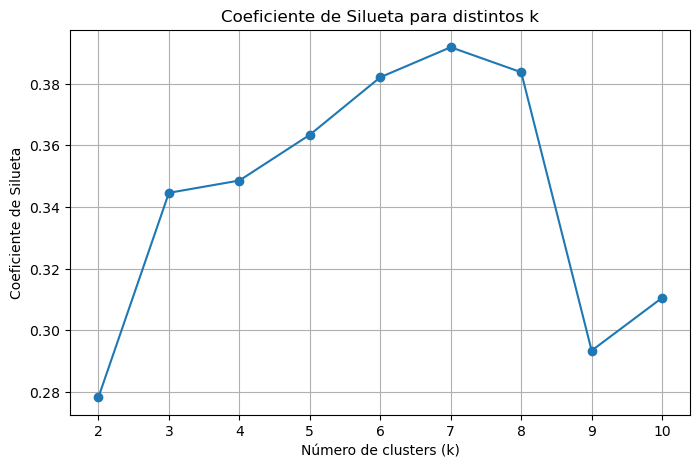

k=2: Silhouette=0.2783
k=3: Silhouette=0.3446
k=4: Silhouette=0.3486
k=5: Silhouette=0.3634
k=6: Silhouette=0.3821
k=7: Silhouette=0.3918
k=8: Silhouette=0.3837
k=9: Silhouette=0.2934
k=10: Silhouette=0.3105


In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Graficar los coeficientes de silueta
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Coeficiente de Silueta para distintos k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente de Silueta")
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Mostrar resultados
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: Silhouette={score:.4f}")


Según la validación con el coeficiente de silueta, el mejor resultado se obtiene con k=7, alcanzando un valor de 0.3912, lo cual indica una separación aceptable entre clusters aunque no muy marcada. Por su parte, el método del codo sugiere que k=4 o k=5 podrían ser opciones razonables, dado que a partir de ese punto la reducción de la inercia se hace más gradual. Considerando ambos criterios, se concluye que el número de clusters óptimo se encuentra en el rango de 5 a 7. Para este estudio se selecciona k=7, ya que permite capturar mayor variabilidad en los datos y se alinea con la métrica cuantitativa que mostró el mejor desempeño.

### 3.3 Validación del modelo

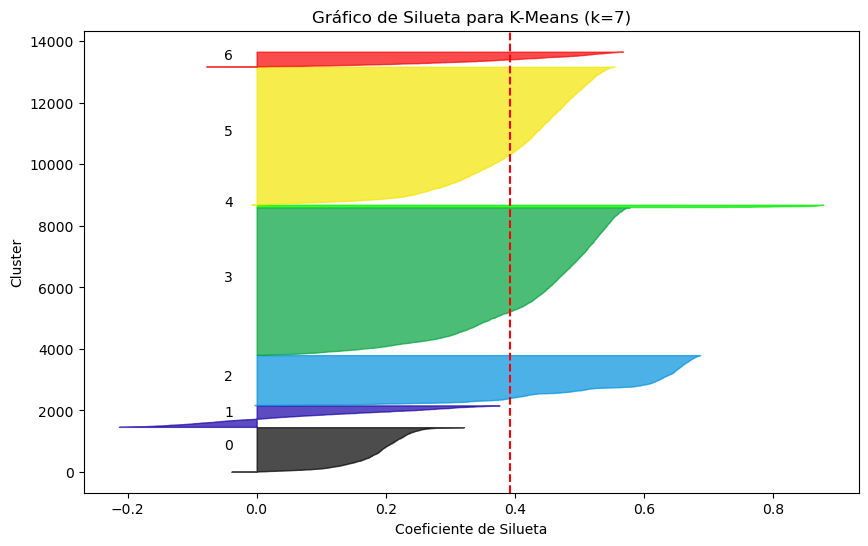

Coeficiente de silueta promedio: 0.3918


In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
import numpy as np

# Ajustar modelo con k=7
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Calcular valores de silueta para cada punto
silhouette_vals = silhouette_samples(X_scaled, labels)
silhouette_avg = silhouette_score(X_scaled, labels)

# Graficar silueta
plt.figure(figsize=(10,6))
y_lower = 10

for i in range(7):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = cm.nipy_spectral(float(i) / 7)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de Silueta para K-Means (k=7)")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Cluster")
plt.show()

print(f"Coeficiente de silueta promedio: {silhouette_avg:.4f}")


El gráfico de silueta para k=7 muestra un coeficiente promedio de 0.39, lo que indica una calidad de clustering moderada. Se observa que algunos clusters (como el 3, 4 y 5) tienen valores de silueta en general altos y positivos, reflejando que los datos dentro de ellos están bien cohesionados y relativamente separados de los demás grupos. Sin embargo, otros clusters como el 0 y el 6 presentan varias observaciones con valores cercanos a cero o incluso negativos, lo que sugiere traslape y posibles asignaciones ambiguas de datos entre grupos vecinos. En conclusión, aunque el modelo con k=7 logra una segmentación razonable y consistente en la mayoría de los casos, todavía existen clusters menos definidos, lo que abre la posibilidad de explorar ajustes adicionales (como probar otra métrica de distancia o métodos distintos de clustering) para mejorar la separación entre grupos.

### 3.4 Interpretación de resultados

In [22]:
# CENTROIDES EN ESCALA ORIGINAL

# Invertir la estandarización de los centroides
centroides_originales = scaler.inverse_transform(kmeans.cluster_centers_)

# Crear DataFrame con nombres de variables
centroides_df = pd.DataFrame(
    centroides_originales,
    columns=X.columns
)

# Agregar columna de cluster
centroides_df["Cluster"] = range(0, kmeans.n_clusters)

# Mostrar resultado ordenado por cluster
centroides_df.set_index("Cluster", inplace=True)
centroides_df


,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,FactorForma4,RelacionAspecto_alargado,RelacionAspecto_redondeado,MétodoSecado_honey,MétodoSecado_lavado,MétodoSecado_natural
Cluster,,,,,,,,,,,,
0,48705.220304,8.263333e+05,0.773430,0.748192,0.987277,8.838291e-07,0.995281,9.523481e-01,1.381215e-03,3.382711e-17,5.041436e-01,4.482044e-01
1,67666.077364,9.183637e+05,0.816104,0.724861,0.975587,7.222170e-01,0.983390,9.670487e-01,1.432665e-03,5.204170e-18,3.123209e-01,6.346705e-01
2,39346.054154,6.676802e+05,0.570014,0.775345,0.989758,8.213761e-01,0.998109,1.110223e-16,9.778462e-01,3.816392e-17,9.206154e-01,4.246154e-02
3,49522.253392,7.349087e+05,0.766123,0.785868,0.987715,8.745586e-01,0.995518,9.703611e-01,1.665335e-16,-6.678685e-17,9.553329e-01,-2.053913e-15
4,41070.453333,6.676314e+05,0.577045,0.742118,0.988225,7.950975e-01,0.997135,1.110223e-16,9.866667e-01,1.000000e+00,2.220446e-16,-5.551115e-17
5,48135.954850,7.371308e+05,0.782626,0.703239,0.987187,8.582982e-01,0.995454,9.637908e-01,1.387779e-16,-5.724587e-17,4.440892e-15,9.649084e-01
6,174213.158333,1.479821e+06,0.771230,0.778938,0.987208,7.418375e-01,0.992366,9.687500e-01,4.166667e-03,-8.673617e-19,7.687500e-01,1.875000e-01


La ejecución de K-Means con k=7 permitió identificar grupos de granos de café con diferencias significativas en sus características morfológicas. Una de las dimensiones más relevantes de separación fue el tamaño: algunos clusters, como el 6, agrupan granos de gran tamaño, mientras que otros, como los clusters 2 y 4, concentran granos más pequeños. Esta diferenciación es coherente con el objetivo de la empresa de garantizar la uniformidad, ya que las diferencias de tamaño impactan directamente en los procesos de tostión y selección.

En cuanto a la forma, los clusters también revelan patrones importantes. Los clusters 2 y 4 se destacan por concentrar granos con baja excentricidad y alta redondez, lo que indica morfologías más compactas y redondeadas. En contraste, clusters como el 1 y el 5 presentan valores de excentricidad más altos, correspondientes a granos más alargados. Estas diferencias en la forma del grano son de gran valor para la caracterización morfológica y pueden contribuir a desarrollar perfiles de calidad más consistentes.

Otro hallazgo relevante es la relación de los clusters con el método de secado. Se evidenció que algunos grupos se asocian de manera clara con un proceso específico: por ejemplo, el cluster 3 está fuertemente vinculado al método lavado, mientras que el cluster 6 se relaciona casi exclusivamente con el método natural. Otros clusters presentan una distribución más mixta entre métodos, lo cual sugiere que la morfología del grano no solo depende del genotipo, sino también de los procesos de beneficio aplicados.

Finalmente, se observó que la variable RelaciónAspecto también influyó en la agrupación. Aunque la mayoría de clusters se componen en gran parte por granos alargados, los clusters 2 y 4 destacan por la presencia de granos mayoritariamente redondeados, lo que confirma que el algoritmo fue capaz de capturar variaciones en la forma.

### 3.5 Conclusiones de K-means

El modelo de K-Means permitió identificar siete grupos principales de granos de café que se diferencian principalmente por características como el tamaño (Área y Perímetro), la forma geométrica (Excentricidad, Redondez, Solidez) y algunos aspectos asociados al método de secado. Aunque el coeficiente de silueta promedio (≈0.39) no indica una separación perfecta entre los grupos, sí muestra que el modelo logra capturar patrones relevantes dentro de los datos, especialmente al distinguir entre granos de gran tamaño, granos más compactos y redondeados, y aquellos con morfologías intermedias.

Estos resultados son valiosos para SenecaféAlpes, pues ofrecen un primer acercamiento a la caracterización de los granos que podría usarse para mejorar el control de calidad y para el diseño de mezclas diferenciadas en el mercado. Sin embargo, es importante notar que K-Means tiene limitaciones: al asumir que los clusters son esféricos y de tamaños similares, podría no adaptarse bien a estructuras más complejas de los datos.

Por esta razón, se deja abierta la exploración hacia otros algoritmos de agrupación que no comparten estas restricciones, como los que trabajarán mis compañeros en este proyecto. El análisis con métodos alternativos permitirá contrastar los resultados obtenidos y evaluar si otros enfoques ofrecen una segmentación más clara, robusta o útil para la organización.

## 4. Modelo 2

### 4.1 Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

### 4.2 Preparación de datos (Escalado de variables)

In [24]:
num_col = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
X = df[num_cols].copy()

In [25]:
# --- 2) Escalado ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape X_scaled:", X_scaled.shape)


Shape X_scaled: (13591, 7)


En esta sección se seleccionaron las variables numéricas del dataset (7 en total) y se aplicó un escalado mediante `StandardScaler` para normalizar los valores.  
El resultado fue una matriz `X_scaled` con forma (13591, 7), es decir, 13.591 observaciones y 7 características estandarizadas.


### 4.3 Selección de Parámetros iniciales

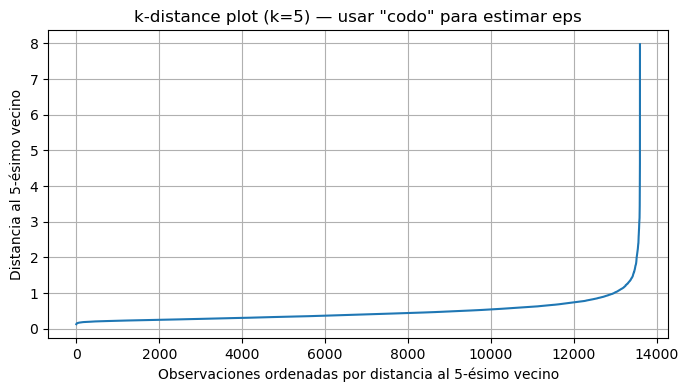

In [ ]:
# --- 3) Ayuda para escoger eps: k-distance plot (k = min_samples-1) ---
k = 5  
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel(f'Observaciones ordenadas por distancia al {k}-ésimo vecino')
plt.ylabel(f'Distancia al {k}-ésimo vecino')
plt.title(f'k-distance plot (k={k}) — usar "codo" para estimar eps')
plt.grid(True)
plt.show()


Se generó el gráfico k-distance con `k=5` (equivalente a `min_samples=6`).  
El "codo" se observa alrededor de la distancia = 1, aproximadamente en la observación 13.000.  
Este valor orienta la elección del parámetro `eps` en el rango de 1 a 2.


### 4.4 Búsqueda de parámetros óptimos

In [27]:
# --- 4) Grid-search manual sobre eps y min_samples ---
eps_candidates = np.linspace(0.2, 2.0, 10)  # rango a ajustar según k-distance plot
min_samples_candidates = [4,5,8,10,15]

results = []
for ms in min_samples_candidates:
    for eps in eps_candidates:
        db = DBSCAN(eps=eps, min_samples=ms, metric='euclidean', n_jobs=-1)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        if n_clusters > 1:
            try:
                sil = silhouette_score(X_scaled, labels)
            except Exception:
                sil = np.nan
        else:
            sil = np.nan
        results.append((ms, eps, n_clusters, n_noise, sil))

results_df = pd.DataFrame(results, columns=['min_samples','eps','n_clusters','n_noise','silhouette'])
results_df = results_df.sort_values(by=['silhouette'], ascending=False)
results_df.head(10)


,min_samples,eps,n_clusters,n_noise,silhouette
48,15,1.8,2,101,0.299184
49,15,2.0,2,69,0.297860
39,10,2.0,2,56,0.297266
29,8,2.0,2,52,0.297143
28,8,1.8,2,74,0.296965
38,10,1.8,2,76,0.296848
8,4,1.8,3,47,0.294453
9,4,2.0,5,29,0.293837
19,5,2.0,3,41,0.291339
18,5,1.8,3,54,0.291111


Se realizó un grid search manual variando `eps` (0.2 a 10) y `min_samples` (4, 5, 8, 10, 15).  
Los resultados muestran que las mejores configuraciones logran valores de Silhouette cercanos a 0.30.  
La mejor configuración encontrada fue con `min_samples=15` y `eps=1.8`, que formó 2 clusters con 101 puntos de ruido y un silhouette de 0.299.


In [28]:
# Mostrar las mejores configuraciones
print("Top 8 configuraciones según silhouette (mayor mejor):")
display(results_df.head(8))


Top 8 configuraciones según silhouette (mayor mejor):


,min_samples,eps,n_clusters,n_noise,silhouette
48,15,1.8,2,101,0.299184
49,15,2.0,2,69,0.297860
39,10,2.0,2,56,0.297266
29,8,2.0,2,52,0.297143
28,8,1.8,2,74,0.296965
38,10,1.8,2,76,0.296848
8,4,1.8,3,47,0.294453
9,4,2.0,5,29,0.293837


### 4.5 Ajuste del mejor modelo

In [29]:
# --- 5) Ajustar DBSCAN con la mejor configuración ---
best = results_df.dropna(subset=['silhouette']).iloc[0]
best_ms, best_eps = int(best['min_samples']), float(best['eps'])
print(f"Mejor (por silhouette) encontrada: min_samples={best_ms}, eps={best_eps}")

db_best = DBSCAN(eps=best_eps, min_samples=best_ms, n_jobs=-1)
labels_best = db_best.fit_predict(X_scaled)
df['cluster_dbscan'] = labels_best

print("Número de clusters (sin contar -1)", len(set(labels_best)) - (1 if -1 in labels_best else 0))
print("Puntos etiquetados como ruido (-1):", list(labels_best).count(-1))

if len(set(labels_best)) - (1 if -1 in labels_best else 0) > 1:
    try:
        sil_best = silhouette_score(X_scaled, labels_best)
        print("Silhouette (DBSCAN):", sil_best)
    except Exception as e:
        print("Silhouette no se pudo calcular:", e)


Mejor (por silhouette) encontrada: min_samples=15, eps=1.8
Número de clusters (sin contar -1) 2
Puntos etiquetados como ruido (-1): 101
Silhouette (DBSCAN): 0.2991842804140822


Con los parámetros seleccionados (`eps=1.8`, `min_samples=15`), el modelo DBSCAN detectó:  
- 2 clusters principales.  
- 101 puntos etiquetados como ruido.  
- Un Silhouette Score de 0.299, lo cual indica una separación moderada entre clusters.


### 4.6 Visualización de Clusters

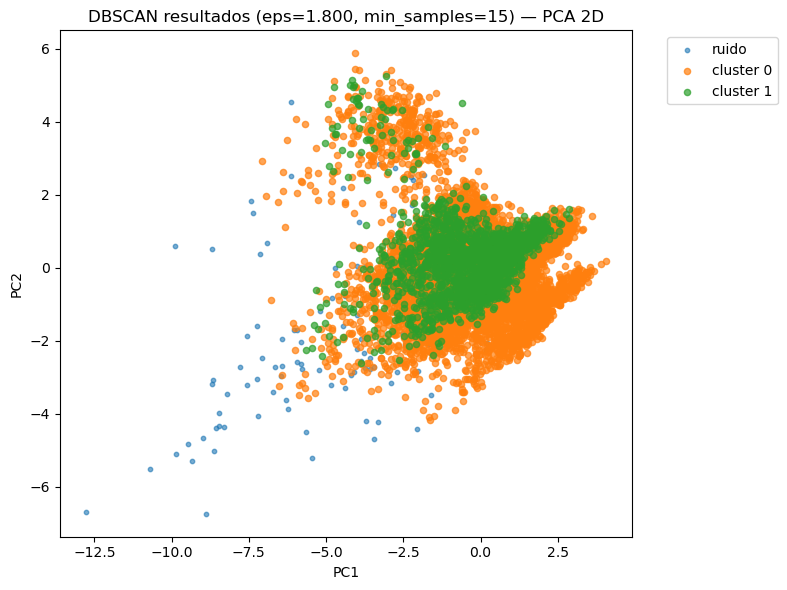

In [30]:
# --- 6) Visualización 2D con PCA --- 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
unique_labels = np.unique(labels_best)
for lab in unique_labels:
    mask = labels_best == lab
    if lab == -1:
        plt.scatter(X_pca[mask,0], X_pca[mask,1], s=10, label='ruido', alpha=0.6)
    else:
        plt.scatter(X_pca[mask,0], X_pca[mask,1], s=20, label=f'cluster {lab}', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title(f'DBSCAN resultados (eps={best_eps:.3f}, min_samples={best_ms}) — PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


Se aplicó PCA para reducir los datos a 2 dimensiones y graficar los clusters resultantes.  
El gráfico muestra dos grupos principales con cierta superposición, además de un conjunto reducido de puntos dispersos clasificados como ruido.  
Esto confirma lo reportado por el silhouette: los clusters existen, pero no están perfectamente separados.


In [32]:
# --- 7) Resumen por cluster (centroides en escala original) ---
centroids = []
for lab in sorted(set(labels_best)):
    if lab == -1:
        continue
    cluster_idx = np.where(labels_best == lab)[0]
    if len(cluster_idx) == 0:
        continue
    mean_scaled = X_scaled[cluster_idx].mean(axis=0)
    mean_orig = scaler.inverse_transform(mean_scaled.reshape(1, -1))[0]
    centroids.append(np.concatenate(([lab], mean_orig)))

cols = ['cluster'] + list(num_cols)
centroids_df = pd.DataFrame(centroids, columns=cols).set_index('cluster')
display(centroids_df)


,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,FactorForma4
cluster,,,,,,,
0.0,52867.692137,761647.246097,0.750276,0.749719,0.987251,8.740053e-01,0.995195
1.0,52669.832402,846628.521844,0.749824,0.751547,0.987279,8.884150e-07,0.995167


Se calcularon los centroides de cada cluster en la escala original de las variables.  
Los resultados muestran que ambos clusters son muy similares en la mayoría de características (área, excentricidad, solidez y factor de forma).  
Las principales diferencias se encuentran en el perímetro y en la medida, donde el cluster 1 presenta valores mayores que el cluster 0.


### 4.6 Interpretación de resultados

El modelo DBSCAN permitió identificar 2 clusters en los datos y detectar un pequeño grupo de puntos atípicos como ruido.  
Los clusters presentan una diferenciación moderada (Silhouette ≈ 0.30), lo que sugiere solapamiento entre grupos.  
En términos de las variables originales, los clusters difieren principalmente en el perímetro y la medida, mientras que el resto de variables son muy similares.  
DBSCAN aportó ventajas frente a otros métodos: no requiere definir el número de clusters a priori y detecta ruido, aunque la calidad de separación entre clusters resultó limitada.


## 5. Modelo 3

## 6. Selección del mejor modelo